In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
sys.path.append("../")
import pandas as pd
import hyanova as hy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

In [41]:
def anova(dset):
    df = pd.read_csv(f'../grid_searches/grid-search-{dset}.csv')
    params = ['M', 'Gamma', '# Iterations', 'Initial Stepsize', 'Initial D', 'K', 'Reg Parameter']
    result = df.drop(['Train time', 'Train time std', 'Train C-err', 'Train C-err std', 'Test C-err std'], axis = 1)
    col_name = params[:]
    col_name.append('Test C-err')
    result = result.reindex(columns=col_name).copy()
    importance = hy.analyze(result, max_iter = 7)
    importance = importance.sort_values("F_u(v_u/v_all)", ascending = False)
    return importance
anova_a9a = anova("a9a")
anova_ijcnn1 = anova("ijcnn1")
anova_mnist = anova('mnist')
print(anova_mnist)

100%|██████████| 7/7 [00:00<00:00, 25.97it/s]

                     u        v_u F_u(v_u/v_all)
1             (Gamma,)  17.369205       0.916508
2      (# Iterations,)    0.21471       0.011329
0                 (M,)   0.180467       0.009523
5                 (K,)   0.035964       0.001898
3  (Initial Stepsize,)   0.017075       0.000901
6     (Reg Parameter,)   0.007707       0.000407
4         (Initial D,)   0.002176       0.000115


In [42]:
M = [0., 0.003526, 0.009523]
Gamma = [0.595149, 0.339247, 0.916508]
InitialD = [0.141908, 0.000003, 0.000115]
InitialEta = [0.031879, 0.025558, 0.000901]
RegParameter = [0.000083, 0.238061, 0.000407]
Niter = [0.013132, 0.080552, 0.011329]
K = [0.002097, 0.00067, 0.001898]
dico = {'M' : M, 'Gamma' : Gamma, 'Initial D' : InitialD, 'Initial Eta' : InitialEta, 'RegParameter' : RegParameter, 'Niter' : Niter, 'K' : K}
dataframe = pd.DataFrame(dico)

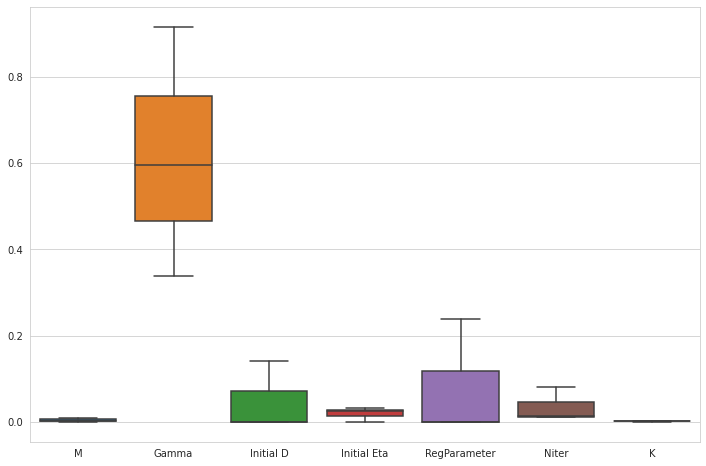

In [48]:
sns.boxplot(data = dataframe)
plt.savefig("fig")